# Answering questions from the students

## 1) Float pointing (in)precision

What is the difference between these two cases below?

### Original example during the class:

In [6]:
y = 3 * 0.1
z = 0.3

print('Is z == 0.3?', z == 0.3)
print('Is z == y?', z == y)

print('y = %.30f' % y)
print('z = %.30f' % z)

Is z == 0.3? True
Is z == y? False
y = 0.300000000000000044408920985006
z = 0.299999999999999988897769753748


### Replacing 0.1 with 1/10

In [7]:
y = 3 / 10
z = 0.3

print('Is z == 0.3?', z == 0.3)
print('Is z == y?', z == y)

print('y = %.30f' % y)
print('z = %.30f' % z)

Is z == 0.3? True
Is z == y? True
y = 0.299999999999999988897769753748
z = 0.299999999999999988897769753748


### Answer

First, as we have seen, the binary representation of 0.1 is a repeating fraction

$$(0.1)_b = 0.0001100110011001100110011001100110011\dots$$

So a truncation leads to imprecision.

On the other hand, 10 is an exact integers. All integers are exact (up to the memory limit):

$$(10)_b = 1010$$

So, in the first case (`y = 3 * 0.1`), the 0.1 has the truncaded binary representation. Let's use 9 binary digits, which gives:

$$ (3)_b * (0.1)_b = (11) * (0.000110011) = 0.010011001 \rightarrow 0.298828125$$

In the second case (`y = 3 / 10`) we first do the exact integer division and later truncate the binary representation of the result:

$$ (3)_b / (10)_b = (11) / (1010) = 0.01001101 \rightarrow 0.30078125$$

**Therefore,** the main difference between `y = 3*0.1` and `y = 3/10` is when the binary truncation is done in the CPU.

## 2) How slow is the inverse of a matrix?

Let's solve A.x = b and check it the time it takes to solve it using the inverse of A, or its LU decomposition.

The correct way to check this would be to run it many times and take the average. Then, calculate this average time for each N and make a plot of the time vs N.

... but first I'll just illustrate with a direct time measurement.

In [1]:
import numpy as np
from time import time

N = 5000

# the b vector
b = np.random.randn(N)

# random matrix with gaussian distribution
A = np.random.randn(N,N)/N
# make it symmetric and positive
A = A.T @ A

In [2]:
t0 = time()
# solve it using the inverse
x0 = np.linalg.inv(A) @ b
t1 = time()
print('Using the inverse took', t1-t0, ' seconds')

Using the inverse took 14.528341054916382  seconds


In [4]:
t0 = time()
# solve it using Lapacks _gesv (LU decomposition)
x1 = np.linalg.solve(A, b)
t1 = time()
print('Using the LU decomposition', t1-t0, ' seconds')

Using the LU decomposition 1.6843228340148926  seconds


## Now let's do the proper plot

In [12]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

In [13]:
def averagetime1(N, its):
    b = np.random.randn(N)
    A = np.random.randn(N,N)/N
    A = A.T @ A

    delta = 0
    for n in range(its):
        t0 = time()
        x1 = np.linalg.solve(A, b)
        t1 = time()
        delta += t1-t0
    return delta/n

In [19]:
def averagetime2(N, its):
    b = np.random.randn(N)
    A = np.random.randn(N,N)/N
    A = A.T @ A

    delta = 0
    for n in range(its):
        t0 = time()
        x0 = np.linalg.inv(A) @ b
        t1 = time()
        delta += t1-t0
    return delta/n

In [25]:
Ns = list(range(50, 2000, 50))

# for each N, run 20 trials to average
t1 = [averagetime1(N, 20) for N in Ns]
t2 = [averagetime2(N, 20) for N in Ns]

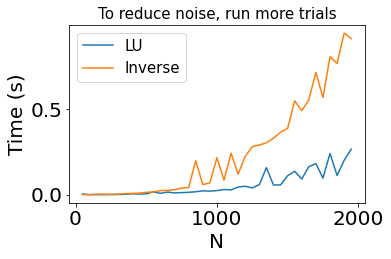

In [30]:
plt.title('To reduce noise, run more trials', fontsize=15)
plt.plot(Ns, t1, label='LU')
plt.plot(Ns, t2, label='Inverse')
plt.xlabel('N')
plt.ylabel('Time (s)')
#plt.ylim(0, 1)
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()

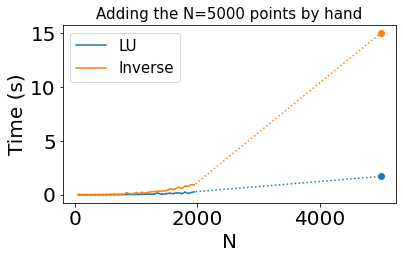

In [35]:
plt.title('Adding the N=5000 points by hand', fontsize=15)
plt.plot(Ns, t1, label='LU')
plt.plot(Ns, t2, label='Inverse')
plt.scatter([5000], [1.7], c='C0')
plt.scatter([5000], [15], c='C1')
plt.plot(Ns + [5000], t1 + [1.7], ls=':', c='C0')
plt.plot(Ns + [5000], t2 + [15], ls=':', c='C1')
plt.xlabel('N')
plt.ylabel('Time (s)')
#plt.ylim(0, 1)
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()